In [1]:
# importing libraries
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings("ignore")


In [2]:
#loading the dataset
loan = pd.read_csv(r"Loan Prediction Dataset.csv")

In [3]:
# checking the first 5 rows of the datset
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
loan['Property_Area'].unique

<bound method Series.unique of 0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int32>

In [4]:
# Getting the info about the datset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# checking the null values 
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Data cleaning 
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].median())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0])
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

In [7]:
# Replace '3+' in Dependents with 3 and convert to numeric
loan['Dependents'] = loan['Dependents'].replace('3+', 3).astype(int)

In [8]:
print("\nCleaned Dataset:")
print(loan.info())


Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB
None


In [9]:
print("\nMissing Values After Cleaning:")
print(loan.isnull().sum())


Missing Values After Cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
# Encoding

In [10]:
# Label encode categorical columns
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    loan[col] = encoder.fit_transform(loan[col])

# Remove Loan_ID (not useful for analysis)
loan.drop(['Loan_ID'], axis=1, inplace=True)


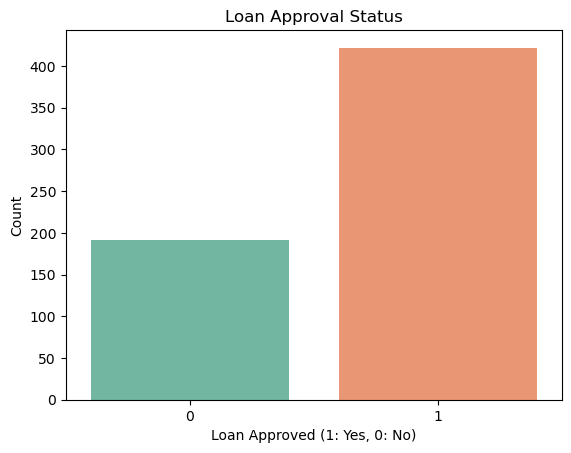

In [11]:
# Loan Approval Distribution
sns.countplot(x='Loan_Status', data=loan, palette='Set2')
plt.title("Loan Approval Status")
plt.xlabel("Loan Approved (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

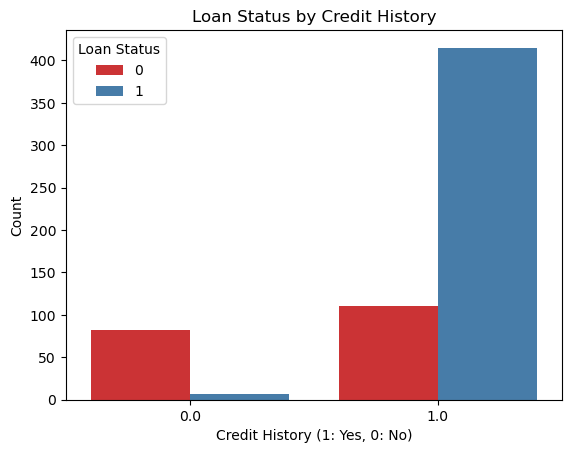

In [12]:
# Loan Status vs. Credit History
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan, palette='Set1')
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History (1: Yes, 0: No)")
plt.ylabel("Count")
plt.legend(title="Loan Status", loc="upper left")
plt.show()

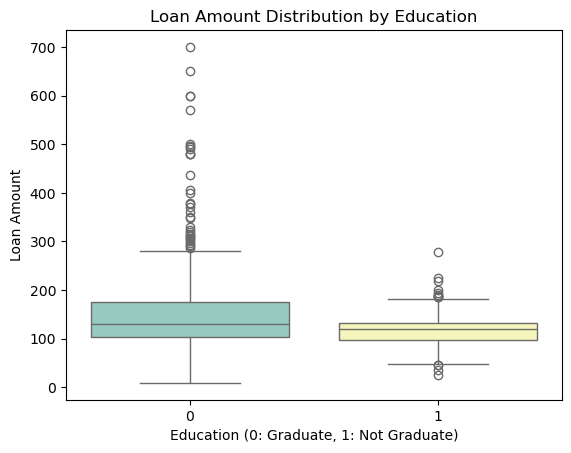

In [13]:
# Education and Loan Amount
sns.boxplot(x='Education', y='LoanAmount', data=loan, palette='Set3')
plt.title("Loan Amount Distribution by Education")
plt.xlabel("Education (0: Graduate, 1: Not Graduate)")
plt.ylabel("Loan Amount")
plt.show()

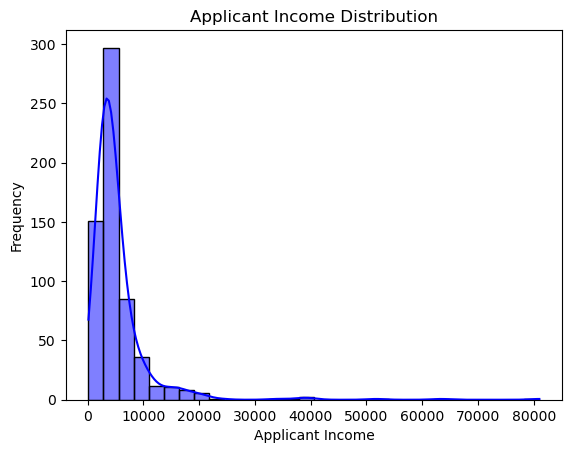

In [14]:
# Applicant Income Distribution
sns.histplot(loan['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

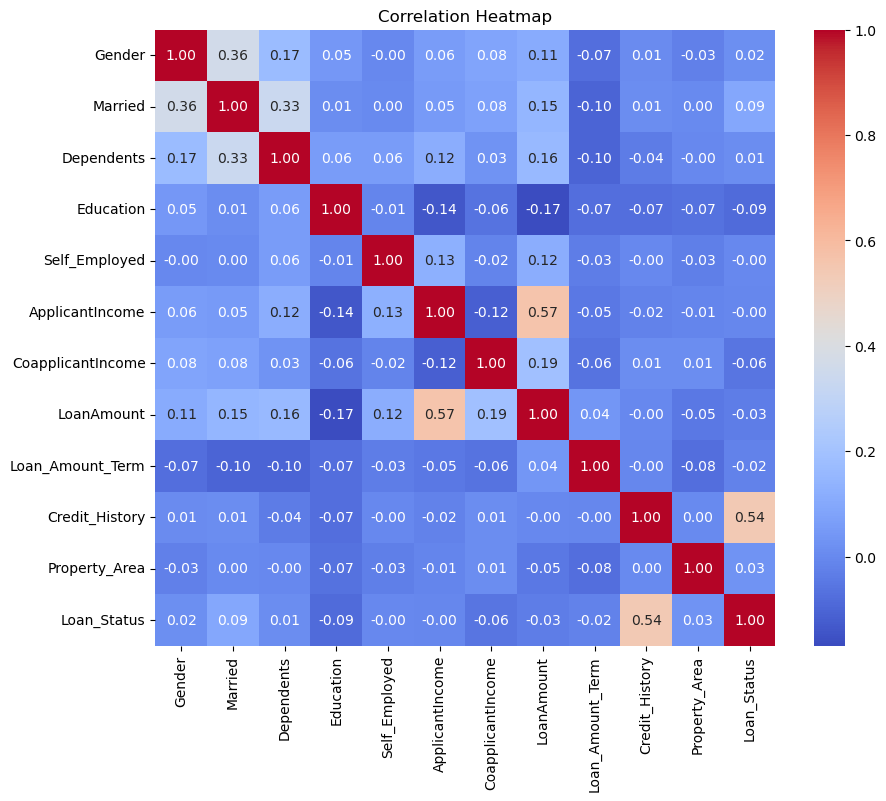

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loan.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

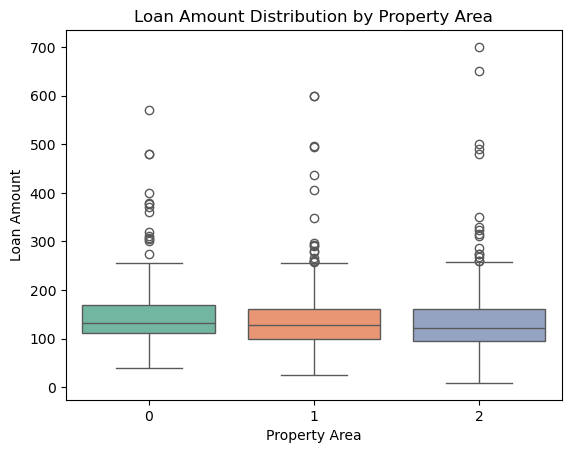

In [19]:
# Loan Amount by Property Area
sns.boxplot(x='Property_Area', y='LoanAmount', data=loan, palette='Set2')
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

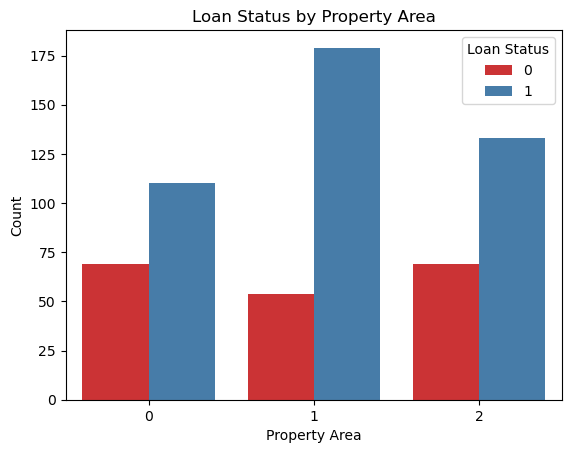

In [18]:
# Loan Status by Property Area
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan, palette='Set1')
plt.title("Loan Status by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

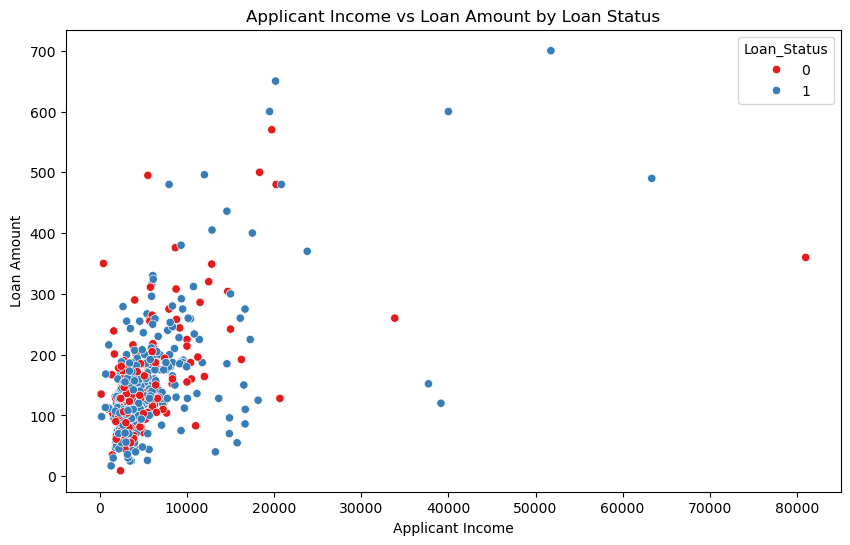

In [20]:
# Loan Amount vs Applicant Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan, palette='Set1')
plt.title("Applicant Income vs Loan Amount by Loan Status")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

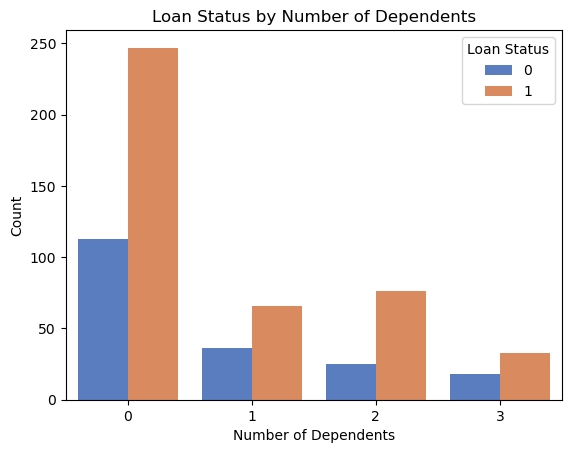

In [21]:
# Dependents Impact on Loan Status
sns.countplot(x='Dependents', hue='Loan_Status', data=loan, palette='muted')
plt.title("Loan Status by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

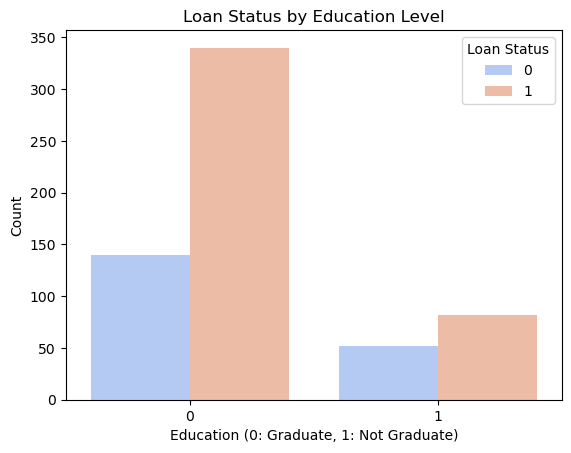

In [22]:
# Education Impact on Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=loan, palette='coolwarm')
plt.title("Loan Status by Education Level")
plt.xlabel("Education (0: Graduate, 1: Not Graduate)")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

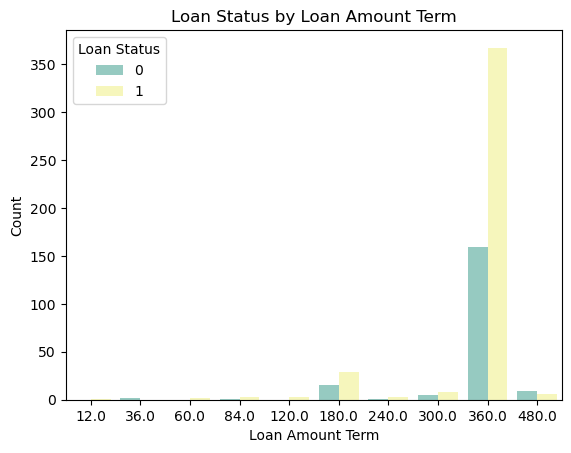

In [23]:
# Loan Amount Term vs Loan Status
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=loan, palette='Set3')
plt.title("Loan Status by Loan Amount Term")
plt.xlabel("Loan Amount Term")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

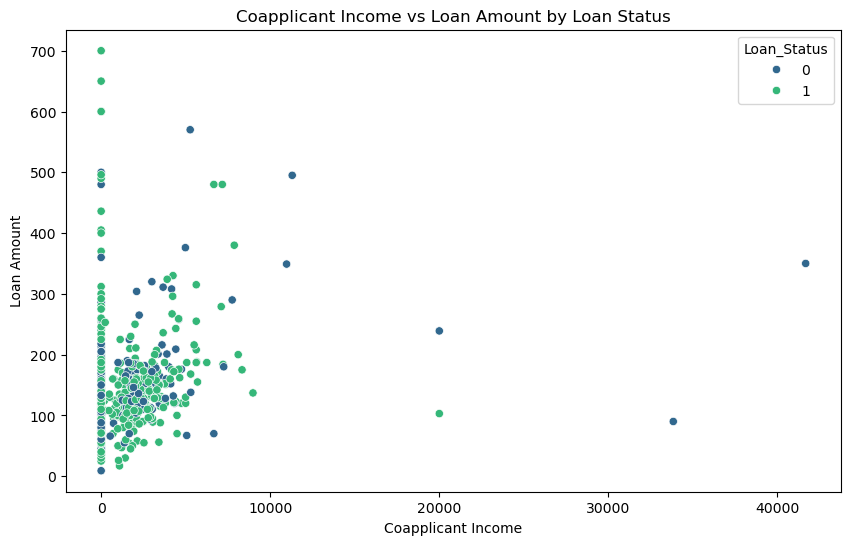

In [24]:
# Coapplicant Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan, palette='viridis')
plt.title("Coapplicant Income vs Loan Amount by Loan Status")
plt.xlabel("Coapplicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [25]:
# splitting the dataset 

In [26]:
# Define features and target
X = loan.drop('Loan_Status', axis=1)
y = loan['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (429, 11)
Testing Set: (185, 11)


In [27]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[ 32  33]
 [  8 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.49      0.61        65
           1       0.77      0.93      0.85       120

    accuracy                           0.78       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.78      0.78      0.76       185


Accuracy Score:
0.7783783783783784


In [28]:
# Export Cleaned Dataset for dashboard building
loan.to_csv("cleaned_loan_data.csv", index=False)

In [ ]:
# prediting the new values for loan approval

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Selecting relevant features, including 'Loan_Amount_Term'
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
            'Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Prepare the feature matrix and target vector
X = loan[features]
y = loan['Loan_Status']

# Encoding categorical variables (if not already encoded)
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model for deployment
joblib.dump(model, "loan_approval_model.pkl")
print("Model saved as 'loan_approval_model.pkl'")


Accuracy: 0.7560975609756098

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Model saved as 'loan_approval_model.pkl'
